In [1]:
from notebook_log_loading import load_sensor_log_file

#sensor_log,first_timestamp=load_sensor_log_file("../to_study/senw_imu.txt")
sensor_log,first_timestamp=load_sensor_log_file("../to_study/initial_motion_calibration.txt")

In [2]:
   
    
def toeuler(q):
    w=q[3]
    i=q[0]
    j=q[1]
    k=q[2]
    s=1
    
    cpch=1-2*s*(j*j+k*k)
    cpsh=2*s*(i*j+k*w)
    sp=2*s*(i*k-j*w)
    sbcp=2*s*(j*k+i*w)    
    cbcp=1-2*s*(i*i+j*j)
    
    conv=360/(2*np.pi)
    #heading=360*np.arctan2(cpsh,cpch)/(2*3.14)
    #pitch=-360*np.arcsin(sp)/(2*3.14)
    #bank=360*np.arctan2(sbcp,cbcp)/(2*3.15)
    heading=conv*np.arctan2( 2*(w*i+j*k),1-2*(i*i+j*j))
    pitch=conv*np.arcsin(np.clip(2*(w*j-k*i),-1,1))    
    bank=conv*np.arctan2( 2*(w*k+i*j),1-2*(j*j+k*k))
    return [heading,pitch,bank]

import numpy as np
rot_vecs=[]
rot_vec_ts=[]
eul_vecs=[]
eul_vecs_ts=[]
accel_vecs=[]
accel_vec_ts=[]
gyro_vecs=[]
gyro_vec_ts=[]
gyro_norm=[]
accel_norm=[]
for entry in sensor_log:
    if 'packets' in entry:
        rot_vec_ts.append(entry["timestamp"]-first_timestamp)
        accel_vec_ts.append(entry["timestamp"]-first_timestamp)
        gyro_vec_ts.append(entry["timestamp"]-first_timestamp)
        if len(entry['packets'])>1:
            print("multipacket!")
        for packet in entry['packets']:
            if 'rotation_vector' in packet:
                #rot_vecs.append(correct(packet["rotation_vector"]))
                eul_vecs.append(toeuler(packet["rotation_vector"]))
                #rot_vecs.append([ toheading(packet["rotation_vector"])])
                rot_vecs.append(packet["rotation_vector"])                
            if 'acceleration' in packet:
                accel_vecs.append(packet["acceleration"])
                accel_norm.append(np.linalg.norm(np.array(packet["acceleration"])))
            if 'gyroscope' in packet:
                gyro_vecs.append(packet["gyroscope"])
                gyro_norm.append( np.linalg.norm(np.array(packet["gyroscope"])))
                
                
rot_vecs=np.array(rot_vecs)
accel_vecs=np.array(accel_vecs)
eul_vecs=np.array(eul_vecs)
gyro_vecs=np.array(gyro_vecs)

In [3]:
sensor_log[0]

{'keys': ['rotation_vector', 'acceleration', 'magnetic_field'],
 'timestamp': 1625850986.7865407,
 'packets': [{'rotation_vector': [0.7010498046875,
    -0.0098876953125,
    0.7130126953125,
    -0.009765625,
    3.1416015625],
   'rotation_vector_timestamp': 64.123825,
   'acceleration': [-0.03125, -0.02734375, -0.01953125],
   'acceleration_timestamp': 64.126181,
   'magnetic_field': [149.6875, -30.375, -37.5625],
   'magneticTs': 64.1262,
   'gyroscope': [-0.001953125, 0.00390625, -0.0078125],
   'gyroscope_timestamp': 64.12636}]}

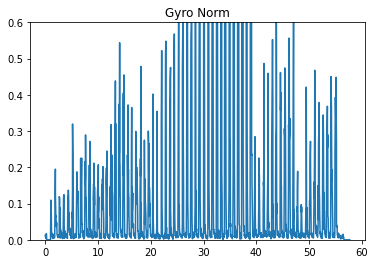

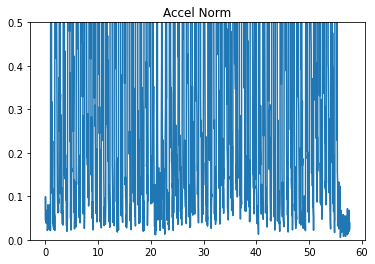

In [13]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
plt.title("Gyro Norm")
plt.ylim([0,0.6])
ax.plot( accel_vec_ts,gyro_norm)
plt.show()

fig, ax = plt.subplots()
plt.title("Accel Norm")
plt.ylim([0,0.5])
ax.plot( accel_vec_ts,accel_norm)
plt.show()

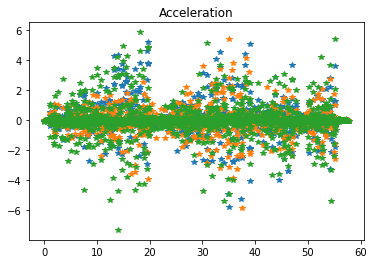

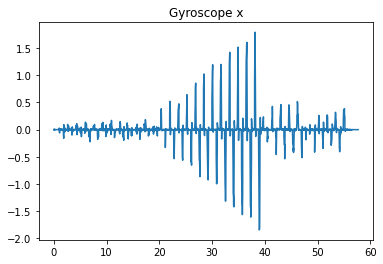

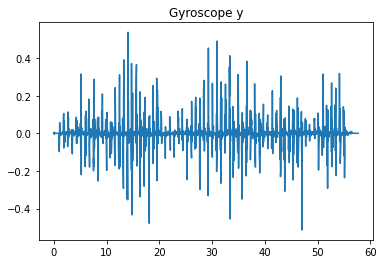

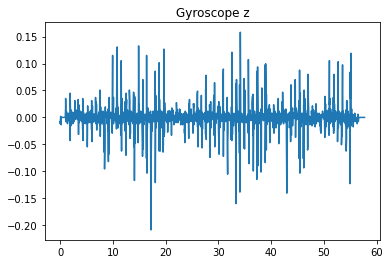

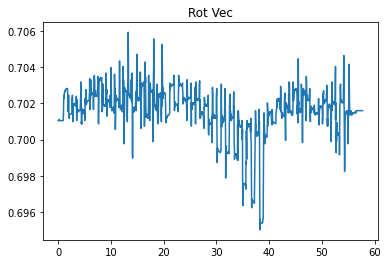

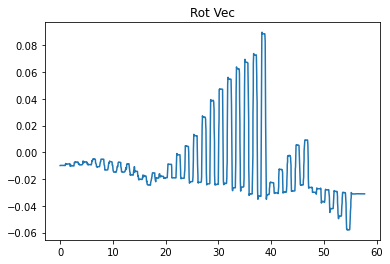

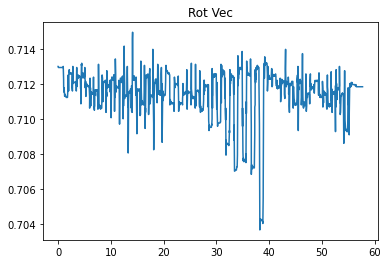

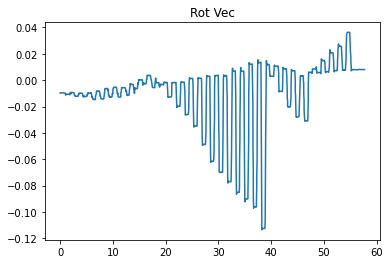

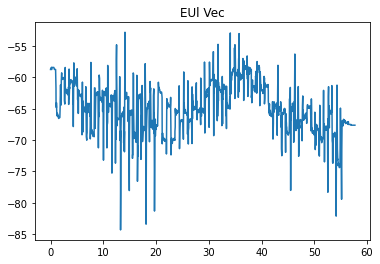

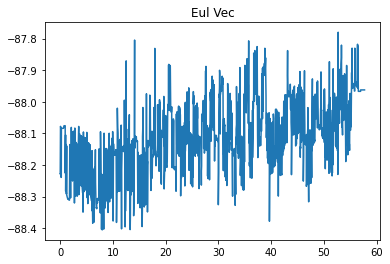

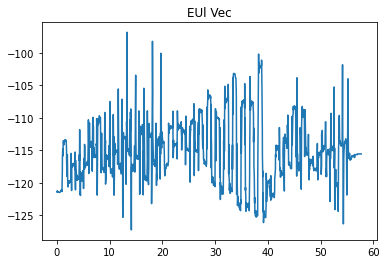

In [5]:


fig, ax = plt.subplots()
plt.title("Acceleration")
ax.plot( accel_vec_ts,accel_vecs,'*')
plt.show()
fig, ax = plt.subplots()
plt.title("Gyroscope x")
ax.plot( accel_vec_ts,gyro_vecs[:,0])
plt.show()
fig, ax = plt.subplots()
plt.title("Gyroscope y")
ax.plot( accel_vec_ts,gyro_vecs[:,1])
plt.show()
fig, ax = plt.subplots()
plt.title("Gyroscope z")
ax.plot( accel_vec_ts,gyro_vecs[:,2])
plt.show()

fig, ax = plt.subplots()
plt.title("Rot Vec")
ax.plot( rot_vec_ts,rot_vecs[:,0])
plt.show()
fig, ax = plt.subplots()
plt.title("Rot Vec")
ax.plot( rot_vec_ts,rot_vecs[:,1])
plt.show()
fig, ax = plt.subplots()
plt.title("Rot Vec")
ax.plot( rot_vec_ts,rot_vecs[:,2])
plt.show()
fig, ax = plt.subplots()
plt.title("Rot Vec")
ax.plot( rot_vec_ts,rot_vecs[:,3])
plt.show()
fig, ax = plt.subplots()
plt.title("EUl Vec")
ax.plot( rot_vec_ts,eul_vecs[:,0])
plt.show()
fig, ax = plt.subplots()
plt.title("Eul Vec")
ax.plot( rot_vec_ts,eul_vecs[:,1])
plt.show()
fig, ax = plt.subplots()
plt.title("EUl Vec")
ax.plot( rot_vec_ts,eul_vecs[:,2])
plt.show()
